In [2]:
# Setup constants
input_width = 224
input_height = 224
channels = 3
testing_directory = "VOCdevkit Testing/VOC2012/JPEGImages/"

classes = {
    0: "background",
    1: "aeroplane",
    2: "bicycle",
    3: "bird",
    4: "boat",
    5: "bottle",
    6: "bus",
    7: "car",
    8: "cat",
    9: "chair",
    10: "cow",
    11: "diningtable",
    12: "dog",
    13: "horse",
    14: "motorbike",
    15: "person",
    16: "pottedplant",
    17: "sheep",
    18: "sofa",
    19: "train",
    20: "tvmonitor",
    21: "border"
}

classes = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
           "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant",
           "sheep", "sofa", "train", "tvmonitor", "border"]

custom_colormapping = {
    0: [0, 0, 0],
    1: [128, 0, 0],
    2: [0, 128, 0],
    3: [0, 0, 128],
    4: [0, 128, 128],
    5: [128, 128, 128],
    6: [255, 255, 0],
    7: [0, 255, 0],
    8: [0, 255, 255],
    9: [64, 64, 64],
    10: [128, 255, 255],
    11: [64, 255, 255],
    12: [128, 32, 32],
    13: [32, 32, 32],
    14: [255, 32, 32],
    15: [255, 255, 128],
    16: [40, 255, 128],
    17: [255, 0, 128],
    18: [200, 200, 200],
    19: [0, 200, 200],
    20: [0, 200, 0],
    21: [255, 255, 0]
}

In [3]:
import image_preprocessing as cig
from keras.models import load_model
from keras.models import model_from_json
import json

def load_model(architecture_in_json, weights_in_h5):
    print("Loading model...")

    json_file = open(architecture_in_json, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(weights_in_h5)

    print("Loaded model from disk")
    return loaded_model

Using TensorFlow backend.
/Applications/anaconda3/envs/DL/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Applications/anaconda3/envs/DL/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Applications/anaconda3/envs/DL/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Applications/anaconda3/envs/

In [4]:
import numpy as np

def get_test_images(image_names):
    x_test = []
    for image_name in image_names:
        x_image = testing_directory + image_name + ".jpg"
        test_image = cig.get_input(testing_directory, image_name, input_width, input_height)
        x_test.append(test_image)
    return np.array(x_test)
    
def predict_test_images(model, x_test):
    return model.predict(x_test, verbose=1)


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def get_output_colored(samples_count, output):
    output_colored = np.zeros((samples_count, input_width, input_height, channels))
    for index, _ in np.ndenumerate(output):
        sample = index[0]
        width = index[1]
        height = index[2]
        class_index = output[sample, width, height]
        rgb_array = custom_colormapping[class_index]
        output_colored[sample, width, height, 0] = rgb_array[0]
        output_colored[sample, width, height, 1] = rgb_array[1]
        output_colored[sample, width, height, 2] = rgb_array[2]
    return output_colored

def get_output_and_distributions(samples_count, predicted):
    distributions = np.zeros((samples_count, 22)).astype(int)
    output = np.zeros((samples_count, input_width, input_height))
    for index, _ in np.ndenumerate(output):
        sample = index[0]
        width = index[1]
        height = index[2]
        class_index = np.argmax(predicted[sample, width, height])
        output[sample, width, height] = class_index
        if class_index != 0 and class_index != 21:
            distributions[sample][class_index] += 1
    distributions = distributions / distributions.sum(axis=1, keepdims=True)
    
    return output, distributions



#index = np.arange(len(distributions[1]))
#plt.bar(index, distributions[1])
#plt.xlabel('Class', fontsize=10)
#plt.ylabel('No of pixels classified', fontsize=10)
#plt.xticks(index, classes, fontsize=5, rotation=30)
#plt.title('Distribution of predicted classes in image')
#plt.show()


In [14]:
model = load_model("custom_models_results/model_unregularized.json", "custom_models_results/model_unregularized.h5")
#model = load_model("custom_models_results/model_regularized.json", "custom_models_results/model_regularized.h5")
#model = load_model("custom_models_results/model_regularized_2.json", "custom_models_results/model_regularized_2.h5")

Loading model...
Loaded model from disk


3/3 [==============================] - 1s 338ms/step


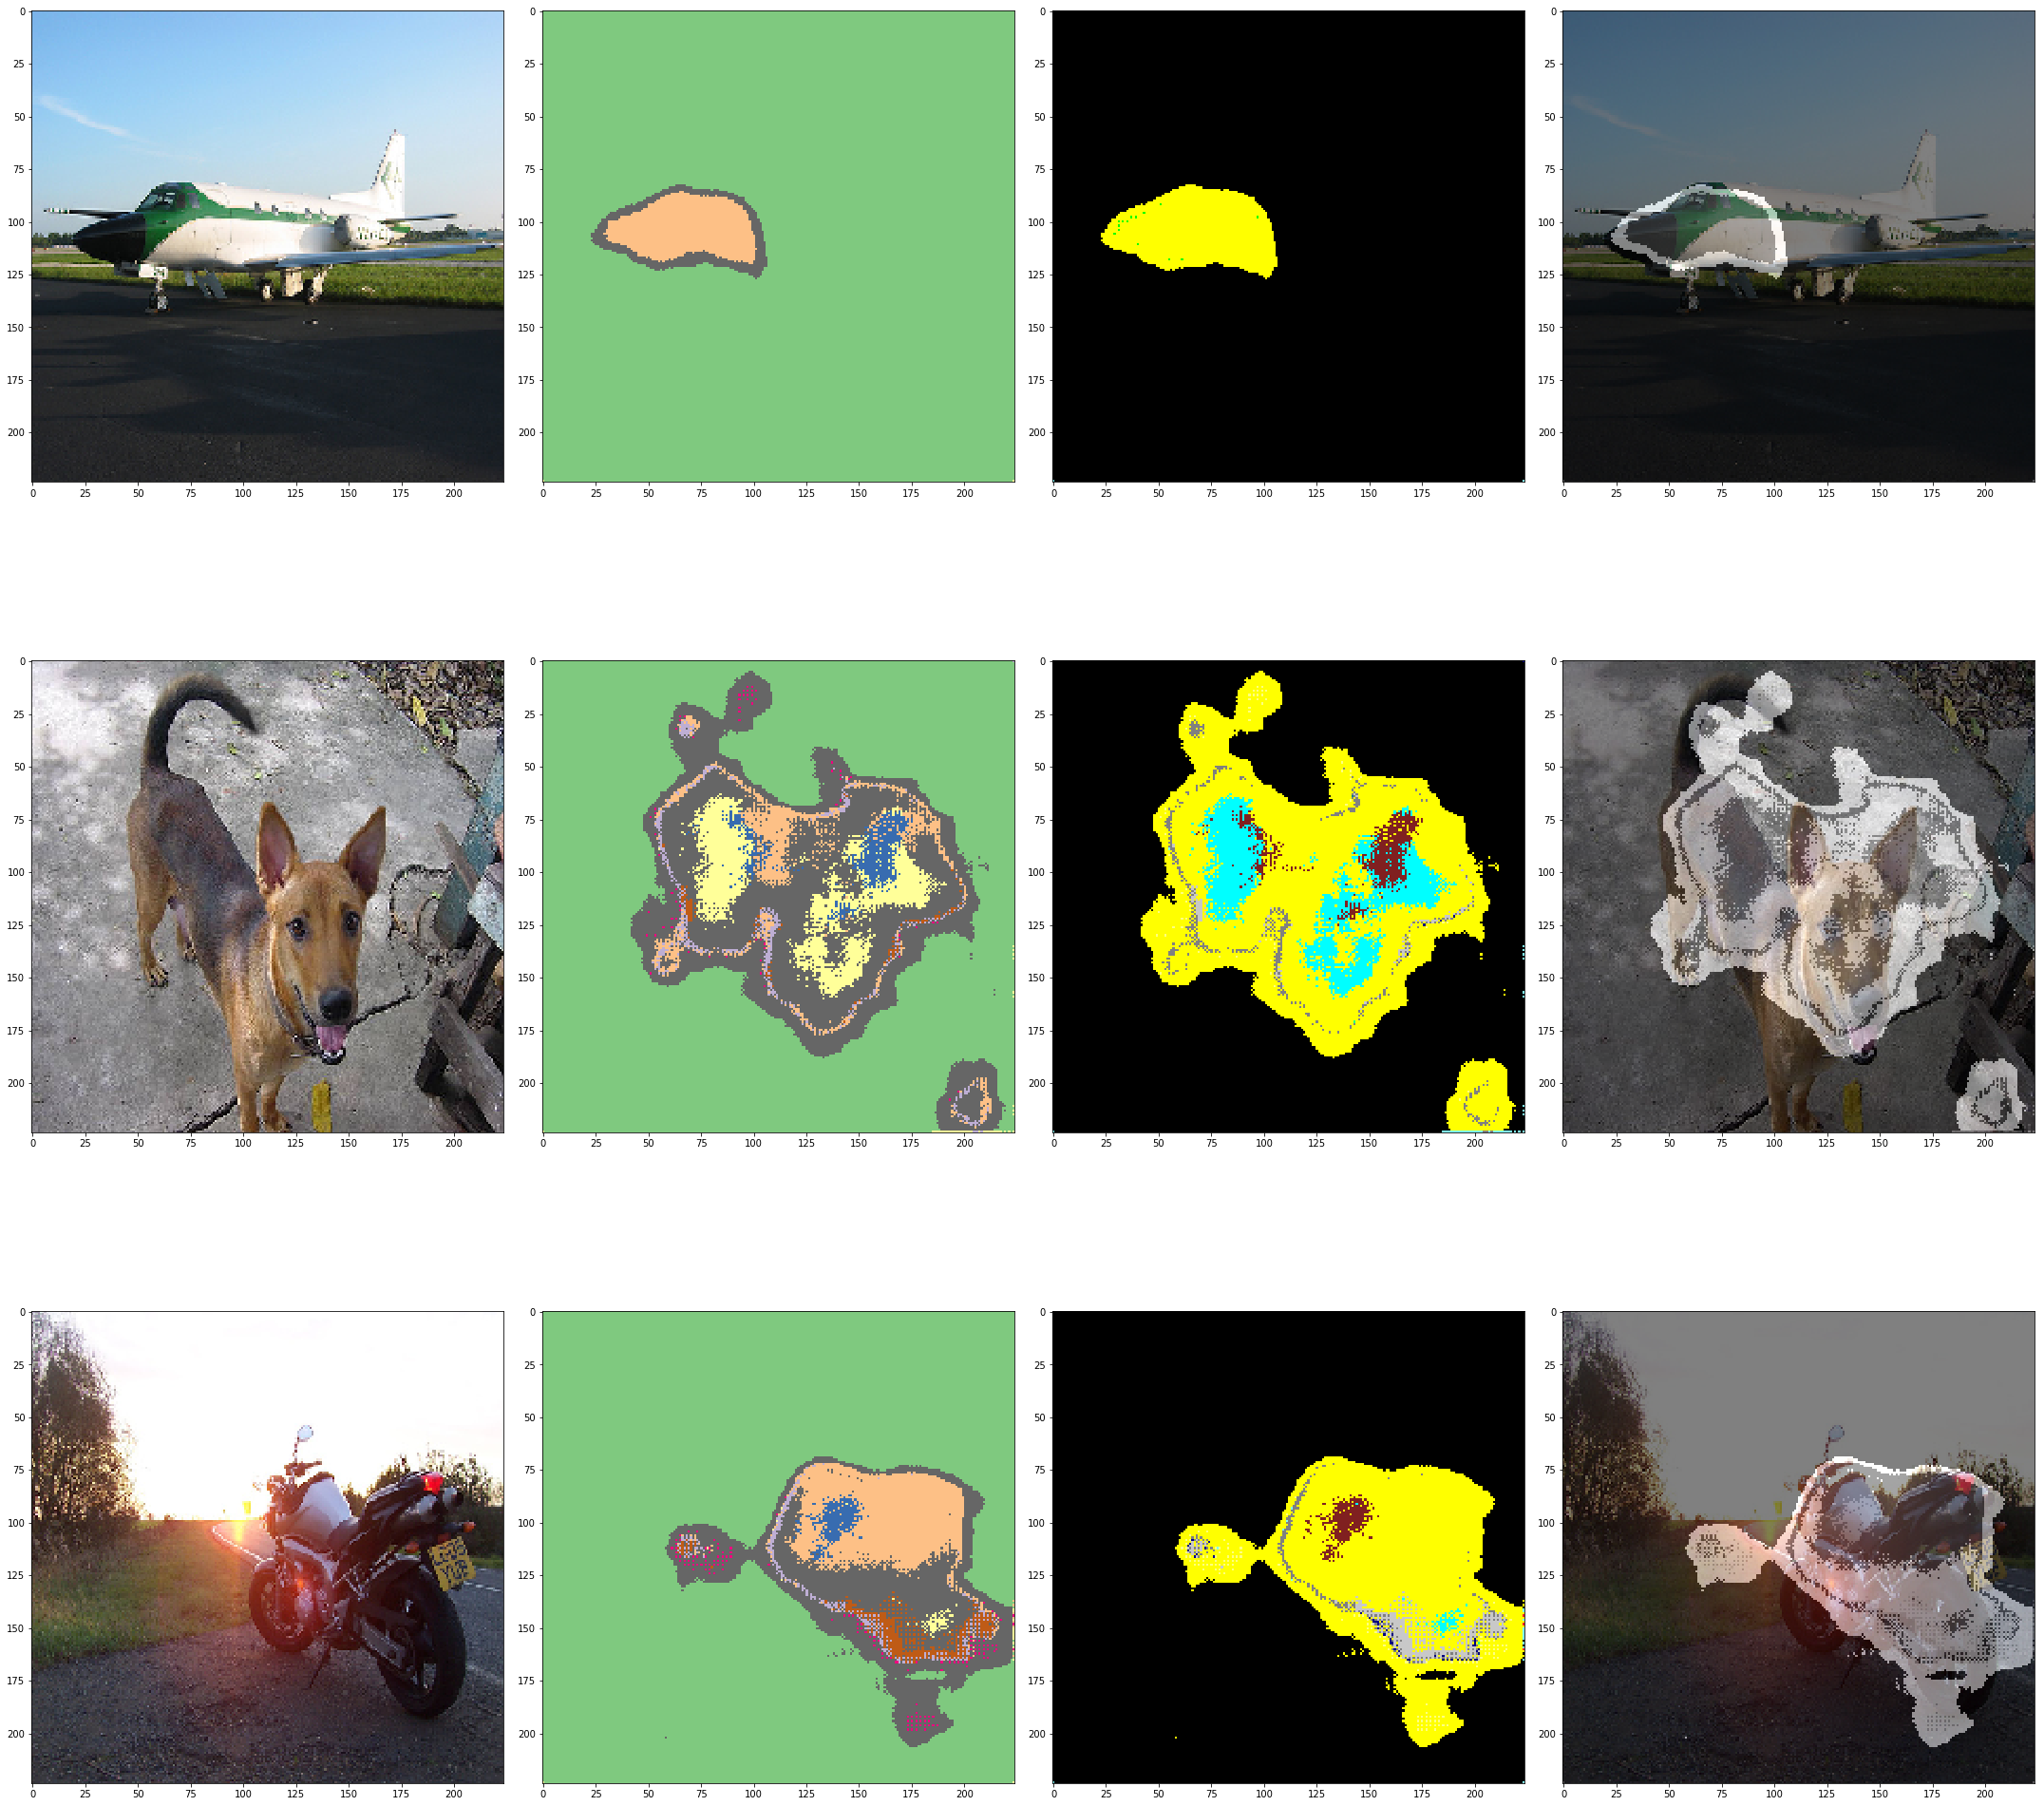

In [15]:
images_to_predict = ['2008_000012', '2008_000030', '2008_000081']
x_test = get_test_images(images_to_predict)
predicted = predict_test_images(model, x_test)
samples_count = len(images_to_predict)

output, distributions = get_output_and_distributions(samples_count, predicted)
output_colored = get_output_colored(samples_count, output)

fig, axs = plt.subplots(samples_count, 4, figsize=(30, 30))

for i in range(samples_count): 
    axs[i,0].imshow((x_test[i]).astype(np.uint8))
    axs[i,1].imshow((output[i].astype(np.uint8)), cmap="Accent")
    axs[i,2].imshow((output_colored[i].astype(np.uint8)))
    axs[i,3].imshow((x_test[i]).astype(np.uint8))
    axs[i,3].imshow((output[i].astype(np.uint8)), cmap="gray", alpha=0.5)
fig.tight_layout()